In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


In [3]:
## Read data
dta = pd.read_csv('/home/metienne/git/TopicsInStatistics/data/overshootday_overview.csv')
dta = dta.dropna()

# Summary for numerical variables
print(dta.describe())


       life_expectancy         hdi  per_capita_gdp          pop  total_prod  \
count       167.000000  167.000000      167.000000   167.000000  167.000000   
mean         72.531798    0.722108    14134.070787    44.491325    3.056235   
std           7.484902    0.150773    19763.533118   158.168844    2.615103   
min          52.805000    0.391000      210.804080     0.096286    0.300103   
25%          67.475500    0.599000     1779.638788     3.060985    1.253923   
50%          74.131000    0.746000     5471.835506     9.630960    1.985990   
75%          77.617700    0.839000    16194.654522    31.758650    4.240380   
max          84.211000    0.956000   111380.649478  1459.380000   12.055943   

       total_cons  number_of_countries_required  number_of_earths_required  \
count  167.000000                    167.000000                 167.000000   
mean     3.227056                      3.702138                   2.039055   
std      2.308365                      8.888881       

In [44]:

# Summary for cetegorical variables
print(dta['region'].value_counts())
print(dta['income_group'].value_counts())

region
Africa                       46
Asia-Pacific                 28
EU                           27
Middle East/Central Asia     23
Central America/Caribbean    17
Other Europe                 12
South America                11
North America                 3
Name: count, dtype: int64
income_group
HI    47
UM    44
LM    44
LI    32
Name: count, dtype: int64


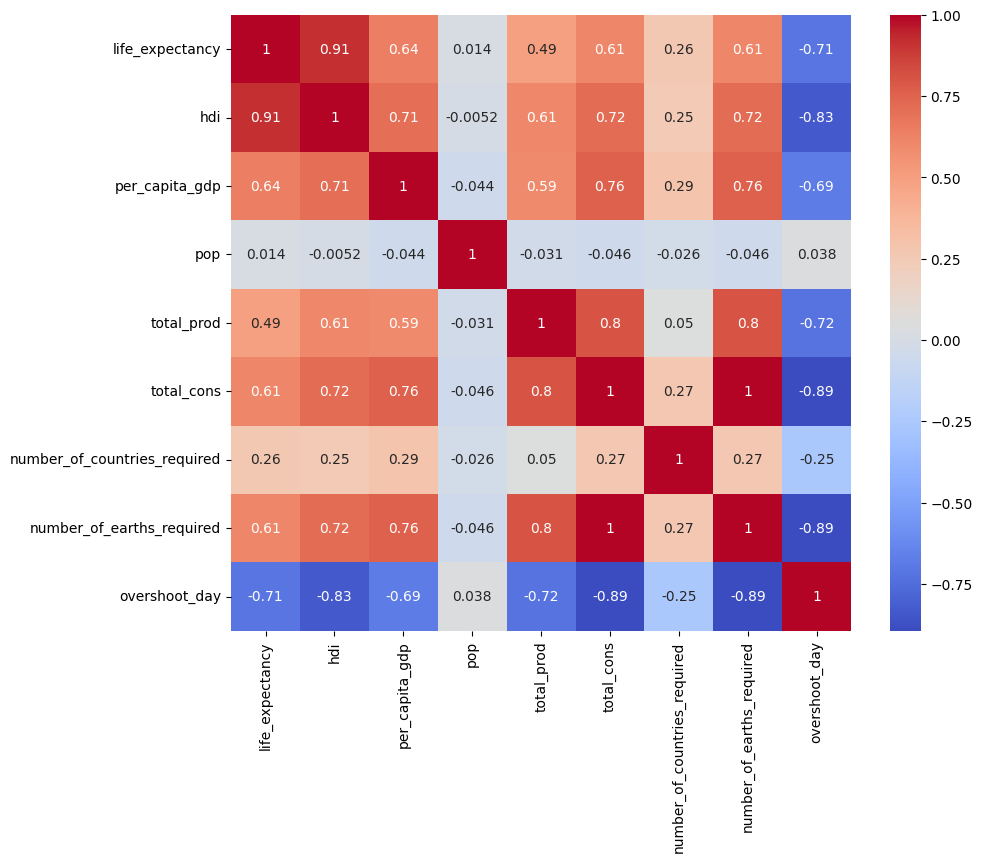

In [16]:


# correlations
# numerical columns 
numeric_columns = dta.select_dtypes(include=['float64', 'int64']).columns

# Correlation with oonly numerical variable
corr_matrix = dta[numeric_columns].corr()

#Correlation as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## How the overshoot day is it linked to life expectancy, human dvp index, per_capita, population, production and consumption ?

## Does this reation change according to the world region ?




In [30]:
m1 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + pop + total_prod + total_cons ', data=dta)

# model ajust
results_m1 = m1.fit()

# print regression results
print(results_m1.summary())

                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     212.2
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.76e-73
Time:                        22:49:17   Log-Likelihood:                -839.22
No. Observations:                 167   AIC:                             1692.
Df Residuals:                     160   BIC:                             1714.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         476.3372     42.542     

In [33]:

m2 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + total_cons ', data=dta)
results_m2 = m2.fit()


In [39]:
m1 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + pop + total_prod + total_cons ', data=dta)
# model ajust
results_m1 = m1.fit()


m2 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + total_cons ', data=dta)
results_m2 = m2.fit()

## compare m1 and m2
anova_results = anova_lm(results_m2, results_m1)
print(anova_results)


   df_resid            ssr  df_diff    ss_diff         F   Pr(>F)
0     162.0  226676.176959      0.0        NaN       NaN      NaN
1     160.0  226532.705100      2.0  143.47186  0.050667  0.95061


In [41]:
print(results_m2.summary())

                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     322.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           5.75e-76
Time:                        22:55:18   Log-Likelihood:                -839.27
No. Observations:                 167   AIC:                             1689.
Df Residuals:                     162   BIC:                             1704.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         476.8718     42.177     

In [43]:
# Getting the covariance matrix of the parameter estimates
cov_matrix = results_m1.cov_params()
print(cov_matrix)

                   Intercept  life_expectancy          hdi  per_capita_gdp  \
Intercept        1809.795372       -38.053115  1307.662264    2.399071e-03   
life_expectancy   -38.053115         0.984492   -47.442516   -1.224311e-05   
hdi              1307.662264       -47.442516  3177.984385   -2.098635e-03   
per_capita_gdp      0.002399        -0.000012    -0.002099    5.922858e-08   
pop                 0.028414        -0.000912     0.023378    1.128577e-07   
total_prod         -5.144821         0.195591   -14.080334    2.688437e-05   
total_cons         -1.542778         0.161323   -27.815941   -2.850716e-04   

                          pop  total_prod  total_cons  
Intercept        2.841366e-02   -5.144821   -1.542778  
life_expectancy -9.124414e-04    0.195591    0.161323  
hdi              2.337776e-02  -14.080334  -27.815941  
per_capita_gdp   1.128577e-07    0.000027   -0.000285  
pop              3.432641e-04   -0.000096    0.001336  
total_prod      -9.620714e-05    3.5624

In [47]:
m3 = smf.ols(formula='overshoot_day ~ income_group + life_expectancy + hdi + per_capita_gdp + total_cons + income_group:life_expectancy + income_group:hdi + income_group:per_capita_gdp + income_group:total_cons', data=dta)
results_m3 = m3.fit()
print(results_m3.summary())

                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           2.17e-90
Time:                        23:01:31   Log-Likelihood:                -759.34
No. Observations:                 167   AIC:                             1559.
Df Residuals:                     147   BIC:                             1621.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [58]:
m4 = smf.ols(formula='overshoot_day ~ income_group + life_expectancy + hdi + per_capita_gdp + total_cons + income_group:hdi + income_group:total_cons', data=dta)
results_m4 = m4.fit()
anova_results = anova_lm(results_m4, results_m3)
print(anova_results)

print(results_m4.summary())

   df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0     153.0  90805.946608      0.0          NaN       NaN       NaN
1     147.0  87032.348502      6.0  3773.598106  1.062285  0.387932
                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     251.2
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           4.78e-96
Time:                        23:06:15   Log-Likelihood:                -762.89
No. Observations:                 167   AIC:                             1554.
Df Residuals:                     153   BIC:                             1597.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
      